# Advanced Certification in AIML
## A Program by IIIT-H and TalentSprint

## Learning Objective

At the end of the experiment, you will be able to :

* Classify fruits data using KNN

## Setup Steps

In [0]:
#@title Please enter your registration id to start: { run: "auto", display-mode: "form" }
Id = "2001337" #@param {type:"string"}


In [0]:
#@title Please enter your password (normally your phone number) to continue: { run: "auto", display-mode: "form" }
password = "9003201490" #@param {type:"string"}


In [0]:
#@title Run this cell to complete the setup for this Notebook
from IPython import get_ipython

ipython = get_ipython()
  
notebook="03_KNN_Scaling" #name of the notebook
Answer = "Ungraded"
def setup():
#  ipython.magic("sx pip3 install torch")  
    ipython.magic("sx wget https://cdn.talentsprint.com/aiml/Experiment_related_data/fruits_weight_sphercity.csv")
    from IPython.display import HTML, display
    display(HTML('<script src="https://dashboard.talentsprint.com/aiml/record_ip.html?traineeId={0}&recordId={1}"></script>'.format(getId(),submission_id)))
    print("Setup completed successfully")
    return

def submit_notebook():
    
    ipython.magic("notebook -e "+ notebook + ".ipynb")
    
    import requests, json, base64, datetime

    url = "https://dashboard.talentsprint.com/xp/app/save_notebook_attempts"
    if not submission_id:
      data = {"id" : getId(), "notebook" : notebook, "mobile" : getPassword()}
      r = requests.post(url, data = data)
      r = json.loads(r.text)

      if r["status"] == "Success":
          return r["record_id"]
      elif "err" in r:        
        print(r["err"])
        return None        
      else:
        print ("Something is wrong, the notebook will not be submitted for grading")
        return None

    elif getAnswer() and getComplexity() and getAdditional() and getConcepts():
      f = open(notebook + ".ipynb", "rb")
      file_hash = base64.b64encode(f.read())

      data = {"complexity" : Complexity, "additional" :Additional, 
              "concepts" : Concepts, "record_id" : submission_id, 
              "answer" : Answer, "id" : Id, "file_hash" : file_hash,
              "notebook" : notebook}

      r = requests.post(url, data = data)
      r = json.loads(r.text)
      print("Your submission is successful.")
      print("Ref Id:", submission_id)
      print("Date of submission: ", r["date"])
      print("Time of submission: ", r["time"])
      print("View your submissions: https://iiith-aiml.talentsprint.com/notebook_submissions")
     # print("For any queries/discrepancies, please connect with mentors through the chat icon in LMS dashboard.")
      return submission_id
    else: submission_id
    

def getAdditional():
  try:
    if not Additional: 
      raise NameError
    else:
      return Additional  
  except NameError:
    print ("Please answer Additional Question")
    return None

def getComplexity():
  try:
    if not Complexity:
      raise NameError
    else:
      return Complexity
  except NameError:
    print ("Please answer Complexity Question")
    return None
  
def getConcepts():
  try:
    if not Concepts:
      raise NameError
    else:
      return Concepts
  except NameError:
    print ("Please answer Concepts Question")
    return None

def getAnswer():
  try:
    if not Answer:
      raise NameError 
    else: 
      return Answer
  except NameError:
    print ("Please answer Question")
    return None

def getId():
  try: 
    return Id if Id else None
  except NameError:
    return None

def getPassword():
  try:
    return password if password else None
  except NameError:
    return None

submission_id = None
### Setup 
if getPassword() and getId():
  submission_id = submit_notebook()
  if submission_id:
    setup()
    
else:
  print ("Please complete Id and Password cells before running setup")



Setup completed successfully


#### Importing the required packages

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
def labels_converter(s):
    s = s.lower()
    if s == "orange":
        return 0
    if s == "apple":
        return 1
    return -1

#### Loading the data

In [0]:
data = pd.read_csv("fruits_weight_sphercity.csv",converters={"labels":labels_converter})

In [0]:
data.head()

,Color,Weight,Sphericity,labels
0,Red,200,0.40,1
1,Orange,320,1.00,0
2,Orange,310,0.95,0
3,Red,220,0.45,1
4,Red,230,0.50,1


In [0]:
data1 = data[0:60:3] # Considering only 20 samples
#data1= data
data1.head()

,Color,Weight,Sphericity,labels
0,Red,200,0.40,1
3,Red,220,0.45,1
6,Red,240,0.35,1
9,Red,243,0.53,1
12,Green,259,0.42,1


#### Checking for length of the dataset

In [0]:
print(len(data))
print(len(data1))

69
20


In [0]:
train = data1 # Considering 20 samples as train set
print(type(train))
test = data[1:50:10] # Considering 5 samples for testing
print(test) 
print(len(test))

<class 'pandas.core.frame.DataFrame'>
     Color  Weight  Sphericity  labels
1   Orange     320        1.00       0
11   Green     255        0.60       1
21   Green     220        0.33       1
31   Green     255        0.69       0
41     Red     200        0.48       1
5


### Applying KNN Classifier on the data

In [0]:
from sklearn.neighbors import KNeighborsClassifier
k = 3
neigh = KNeighborsClassifier(n_neighbors=k,metric="euclidean", algorithm="brute")

In [0]:
traindata = train.values[:,1:3] # Converting dataframe to array

In [0]:
# Training or fitting the model with the train data
neigh.fit(traindata,train.labels)

KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [0]:
test1 = test.values[:,1:3] # Converting dataframe to array

In [0]:
# Testing the trained model
pred1 = neigh.predict(traindata)

In [0]:
print(pred1,"predictions") #Predictions
print(train.values[:,3],"labels") #labels

[1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 0 1] predictions
[1 1 1 1 1 0 0 1 1 1 0 1 1 1 1 0 1 1 0 1] labels


In [0]:
pred_test = neigh.predict(test1)

In [0]:
print(pred_test,"predictions") #Predictions
print(test.values[:,3],"labels") #labels

[0 1 1 1 1] predictions
[0 1 1 0 1] labels


In [0]:
train

,Color,Weight,Sphericity,labels
0,Red,200,0.400,1
3,Red,220,0.450,1
6,Red,240,0.350,1
9,Red,243,0.530,1
12,Green,259,0.420,1
15,Greenish yellow,260,0.750,0
18,Green,266,0.680,0
21,Green,220,0.330,1
24,Red,210,0.390,1
27,Reddish yellow,270,0.333,1


In [0]:
train[train.labels == 1]

,Color,Weight,Sphericity,labels
0,Red,200,0.400,1
3,Red,220,0.450,1
6,Red,240,0.350,1
9,Red,243,0.530,1
12,Green,259,0.420,1
21,Green,220,0.330,1
24,Red,210,0.390,1
27,Reddish yellow,270,0.333,1
33,Green,271,0.550,1
36,Green,270,0.370,1


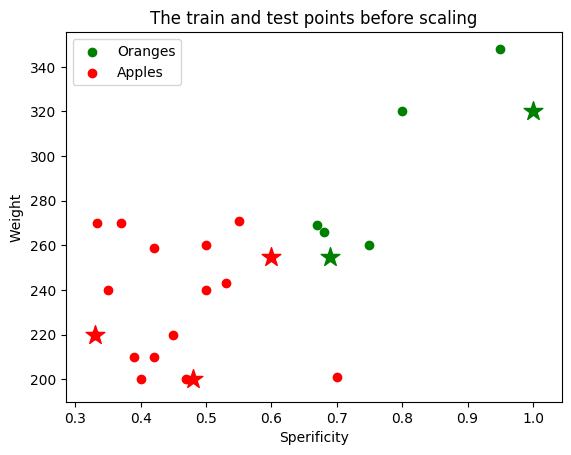

In [0]:
plt.style.use('default')
oranges = train[train.labels == 0]
apples = train[train.labels == 1]
plt.scatter(oranges.Sphericity, oranges.Weight,color="green",marker="o") # Training data
plt.scatter(apples.Sphericity, apples.Weight,color="red",marker="o") # Training data
oranges = test[test.labels == 0]  
apples = test[test.labels == 1]
plt.scatter(oranges.Sphericity, oranges.Weight,color="green",marker="*",s=200) # Testing data
plt.scatter(apples.Sphericity, apples.Weight,color="red",marker="*",s=200) #Testing data
plt.xlabel("Sperificity")
plt.ylabel("Weight")
plt.legend(["Oranges", "Apples"])
plt.title("The train and test points before scaling")
plt.show()

In [0]:
pred_test

array([0, 1, 1, 1, 1])

In [0]:
pred_test.T

array([0, 1, 1, 1, 1])

In [0]:
test1

array([[320, 1.0],
       [255, 0.6],
       [220, 0.33],
       [255, 0.69],
       [200, 0.48]], dtype=object)

In [0]:
import numpy as np
pred2 = np.column_stack((test1,pred_test.T))
print(pred2)

[[320 1.0 0]
 [255 0.6 1]
 [220 0.33 1]
 [255 0.69 1]
 [200 0.48 1]]


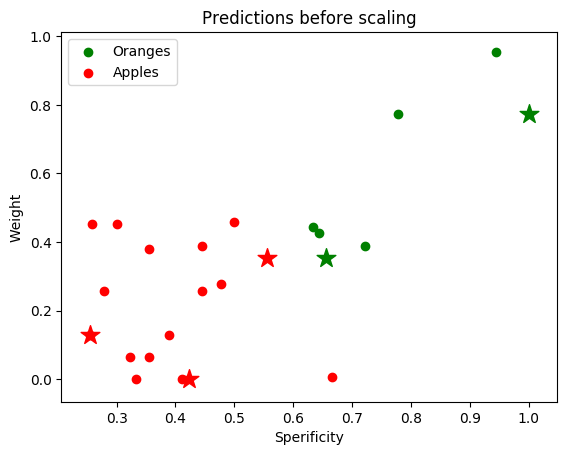

In [0]:
plt.style.use('default')
oranges = train[train.labels == 0]
apples = train[train.labels == 1]

oranges1 = pred2[pred2[:,2]==0]
apples1 = pred2[pred2[:,2]==1]

plt.scatter(oranges.Sphericity, oranges.Weight,color="green",marker="o")
plt.scatter(apples.Sphericity, apples.Weight,color="red",marker="o")

plt.scatter(oranges1[:,1], oranges1[:,0], color="green",marker="*",s=200)
plt.scatter(apples1[:,1], apples1[:,0], color="red",marker="*",s=200)

plt.xlabel("Sperificity")
plt.ylabel("Weight")
plt.legend(["Oranges","Apples"])
plt.title("Predictions before scaling")
plt.show()

In [0]:
oranges1

array([[320, 1.0, 0]], dtype=object)

In [0]:
oranges1[:,1]

array([1.0], dtype=object)

In [0]:
apples1[:,0]

array([255, 220, 255, 200], dtype=object)

In [0]:
apples1[:,1]

array([0.6, 0.33, 0.69, 0.48], dtype=object)

## After Scaling the data

In [0]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [0]:
scaler

MinMaxScaler(copy=True, feature_range=(0, 1))

In [0]:
data.head()

,Color,Weight,Sphericity,labels
0,Red,200,0.40,1
1,Orange,320,1.00,0
2,Orange,310,0.95,0
3,Red,220,0.45,1
4,Red,230,0.50,1


In [0]:
data[['Sphericity', 'Weight']] = scaler.fit_transform(data[['Sphericity', 'Weight']])

In [0]:
data.head()

,Color,Weight,Sphericity,labels
0,Red,0.000000,0.333333,1
1,Orange,0.774194,1.000000,0
2,Orange,0.709677,0.944444,0
3,Red,0.129032,0.388889,1
4,Red,0.193548,0.444444,1


### Taking the data samples for training after the interval of  3

In [0]:
train = data[0:60:3]
print(train)

              Color    Weight  Sphericity  labels
0               Red  0.000000    0.333333       1
3               Red  0.129032    0.388889       1
6               Red  0.258065    0.277778       1
9               Red  0.277419    0.477778       1
12            Green  0.380645    0.355556       1
15  Greenish yellow  0.387097    0.722222       0
18            Green  0.425806    0.644444       0
21            Green  0.129032    0.255556       1
24              Red  0.064516    0.322222       1
27   Reddish yellow  0.451613    0.258889       1
30            Green  0.445161    0.633333       0
33            Green  0.458065    0.500000       1
36            Green  0.451613    0.300000       1
39              Red  0.000000    0.411111       1
42              Red  0.064516    0.355556       1
45           Orange  0.954839    0.944444       0
48              Red  0.258065    0.444444       1
51              Red  0.387097    0.444444       1
54              Red  0.774194    0.777778       0


In [0]:
#test = data.iloc[[5,15,31,49,57]]
test = data[1:50:10]
print(test)
#print(train)
print(len(test))

     Color    Weight  Sphericity  labels
1   Orange  0.774194    1.000000       0
11   Green  0.354839    0.555556       1
21   Green  0.129032    0.255556       1
31   Green  0.354839    0.655556       0
41     Red  0.000000    0.422222       1
5


#### Apply KNN Classifier on the data

In [0]:
from sklearn.neighbors import KNeighborsClassifier
k = 3
neigh = KNeighborsClassifier(n_neighbors=k,metric="euclidean", algorithm="brute")

In [0]:
neigh.predict(test1) = train.values[:,1:3]# Converting dataframe into array

In [0]:
# Training or fitting the model with the train data
neigh.fit(traindata,train.labels)

KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [0]:
pred_train = neigh.predict(traindata)

In [0]:
pred_train

array([1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1])

In [0]:
train.values[:,3]

array([1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1],
      dtype=object)

In [0]:
test1 = test.values[:,1:3] # Converting dataframe into array

In [0]:
test1

array([[0.7741935483870968, 1.0],
       [0.3548387096774195, 0.5555555555555555],
       [0.12903225806451624, 0.2555555555555556],
       [0.3548387096774195, 0.6555555555555554],
       [0.0, 0.4222222222222222]], dtype=object)

In [0]:
# Testing the trained model
pred1 = neigh.predict(test1)

In [0]:
print(pred1,"predictions") #Predictions
print(test.values[:,3],"labels") #labels

[0 1 1 0 1] predictions
[0 1 1 0 1] labels


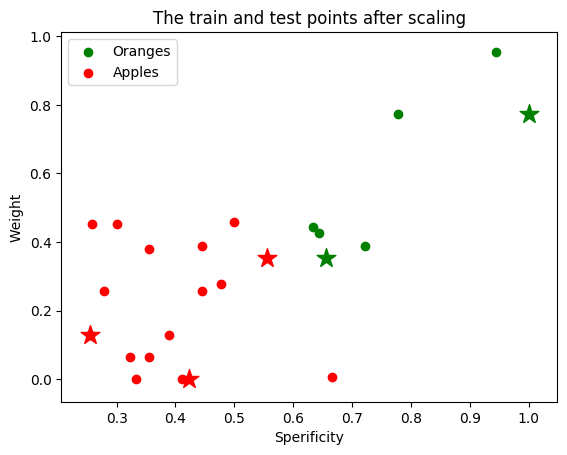

In [0]:
plt.style.use('default')
oranges = train[train.labels == 0]
apples = train[train.labels == 1]
# Plotting Training data
plt.scatter(oranges.Sphericity, oranges.Weight,color="green",marker="o") 
plt.scatter(apples.Sphericity, apples.Weight,color="red",marker="o")
oranges = test[test.labels == 0]
apples = test[test.labels == 1]

# Plotting Testing data
plt.scatter(oranges.Sphericity, oranges.Weight,color="green",marker="*",s=200)
plt.scatter(apples.Sphericity, apples.Weight,color="red",marker="*",s=200)
plt.xlabel("Sperificity")
plt.ylabel("Weight")
plt.legend(["Oranges", "Apples"])
plt.title("The train and test points after scaling")
plt.show()

In [0]:
pred2 = np.column_stack((test1,pred1.T))
print(pred2)

[[0.7741935483870968 1.0 0]
 [0.3548387096774195 0.5555555555555555 1]
 [0.12903225806451624 0.2555555555555556 1]
 [0.3548387096774195 0.6555555555555554 0]
 [0.0 0.4222222222222222 1]]


In [0]:
oranges1[:,0]

array([0.7741935483870968, 0.3548387096774195], dtype=object)

In [0]:
oranges1[:,1]

array([1.0, 0.6555555555555554], dtype=object)

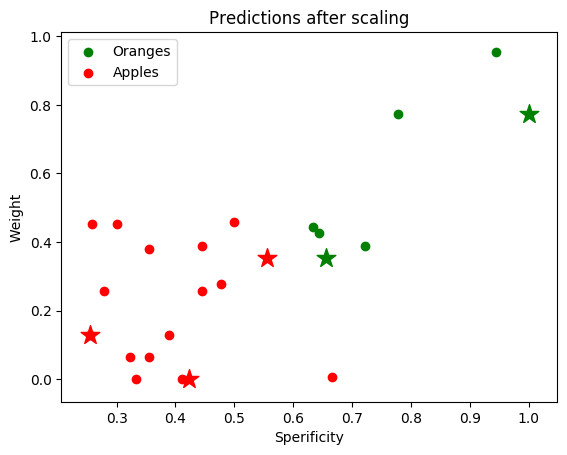

In [0]:
plt.style.use('default')
oranges = train[train.labels == 0]
apples = train[train.labels == 1]

oranges1 = pred2[pred2[:,2]==0]
apples1 = pred2[pred2[:,2]==1]

plt.scatter(oranges.Sphericity, oranges.Weight,color="green",marker="o")
plt.scatter(apples.Sphericity, apples.Weight,color="red",marker="o")

plt.scatter(oranges1[:,1], oranges1[:,0], color="green",marker="*",s=200)
plt.scatter(apples1[:,1], apples1[:,0], color="red",marker="*",s=200)

plt.xlabel("Sperificity")
plt.ylabel("Weight")
plt.legend(["Oranges","Apples"])
plt.title("Predictions after scaling")
plt.show()

##  Please answer the questions below to complete the experiment:

In [0]:
#@title How was the experiment? { run: "auto", form-width: "500px", display-mode: "form" }
Complexity = "Was Tough, but I did it" #@param ["","Too Simple, I am wasting time", "Good, But Not Challenging for me", "Good and Challenging for me", "Was Tough, but I did it", "Too Difficult for me"]


In [0]:
#@title If it was very easy, what more you would have liked to have been added? If it was very difficult, what would you have liked to have been removed? { run: "auto", display-mode: "form" }
Additional = "Please use different variable names for cases prior scaling and after, because when we rerun the initial cell of prior scaling they tend to pick data processed with scaling" #@param {type:"string"}

In [0]:
#@title Can you identify the concepts from the lecture which this experiment covered? { run: "auto", vertical-output: true, display-mode: "form" }
Concepts = "Yes" #@param ["","Yes", "No"]

In [0]:
#@title  Text and image description/explanation and code comments within the experiment: { run: "auto", vertical-output: true, display-mode: "form" }
Comments = "Not Useful" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [0]:
#@title Run this cell to submit your notebook  { vertical-output: true }
try:
  if submission_id:
      return_id = submit_notebook()
      if return_id : submission_id =return_id
  else:
      print("Please complete the setup first.")
except NameError:
  print ("Please complete the setup first.")

Your submission is successful.
Ref Id: 428
Date of submission:  02 Feb 2020
Time of submission:  08:14:00
View your submissions: https://iiith-aiml.talentsprint.com/notebook_submissions
